In [23]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks


In [24]:
ratio_list = np.array([1, 2, 4, 6, 10, 20])


In [25]:
def get_pulse_area_ratio(ratio, plot=False):

    data = np.loadtxt(f'Data/AWG_{ratio}.csv', delimiter=',', skiprows=2)

    # Normalise time
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0] * 1e9


    # Detect peaks
    peaks, _ = find_peaks(data[:,1], distance=200, prominence=0.0001)
    peak_RI = peaks[0]
    peak_RO = peaks[1]

    time_RI_1 = data[peak_RI,0] - 0.3
    time_RI_2 = data[peak_RI,0] + 0.3

    time_RO_1 = data[peak_RO,0] - 0.3
    time_RO_2 = data[peak_RO,0] + 0.3


    # Integrate the area under the curve between tiem_RO_1 and time_RO_2 abd time_RI_1 and time_RI_2
    area_RO = np.trapz(data[(data[:,0] > time_RO_1) & (data[:,0] < time_RO_2),1], x=data[(data[:,0] > time_RO_1) & (data[:,0] < time_RO_2),0])

    area_RI = np.trapz(data[(data[:,0] > time_RI_1) & (data[:,0] < time_RI_2),1], x=data[(data[:,0] > time_RI_1) & (data[:,0] < time_RI_2),0])

    pulse_area_ratio = area_RI/area_RO
    print(f'Pulse area ratio = {pulse_area_ratio}')

    # Plot data
    if plot == True:
        plt.plot(data[:,0], data[:,1])
        plt.plot(data[peaks,0], data[peaks,1], 'x')
        plt.axvline(x=time_RI_1, color='r', linestyle='--')
        plt.axvline(x=time_RI_2, color='r', linestyle='--')
        plt.axvline(x=time_RO_1, color='g', linestyle='--')
        plt.axvline(x=time_RO_2, color='g', linestyle='--')
        plt.xlabel('Time (ns)')
        plt.ylabel('Voltage (V)')
        plt.title(f'Ratio RI/RO = {ratio}')
        plt.grid()
        plt.show()

    return pulse_area_ratio


Pulse area ratio = 0.9932756557990553
Pulse area ratio = 0.5085034825483679
Pulse area ratio = 0.23289291318141353
Pulse area ratio = 0.14501716828930877
Pulse area ratio = 0.09523898047711063
Pulse area ratio = 0.06311116679897275
Total deviation = 0.011976099711186504


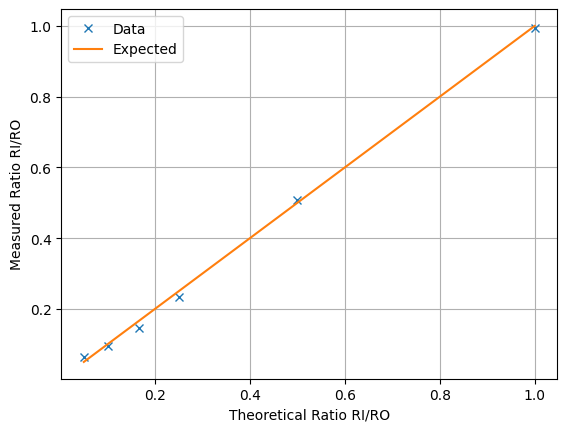

In [26]:
theory_ratio_RI_RO = 1/ratio_list
pulse_area_ratio_list = []

for ratio in ratio_list:
    pulse_area_ratio_list.append(get_pulse_area_ratio(ratio))

# Get total deviation in the pulse area ratio from excpedted value
total_deviation = np.sum(np.abs(theory_ratio_RI_RO - pulse_area_ratio_list))/len(ratio_list)
print(f'Total deviation = {total_deviation}')

plt.figure()
plt.plot(theory_ratio_RI_RO, pulse_area_ratio_list, 'x', label='Data')
plt.plot(theory_ratio_RI_RO, theory_ratio_RI_RO, label='Expected')
plt.xlabel('Theoretical Ratio RI/RO')
plt.ylabel('Measured Ratio RI/RO')
plt.legend()
plt.grid()
plt.show()

Pulse area ratio = 0.06311116679897275


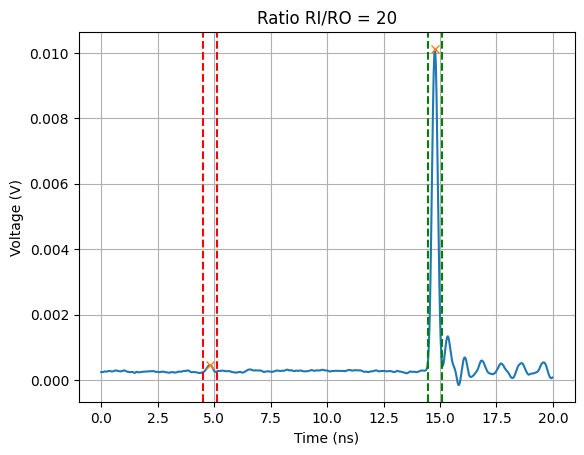

In [9]:
ratio = 20

data = np.loadtxt(f'Data/AWG_{ratio}.csv', delimiter=',', skiprows=2)

# Normalise time
data[:,0] = data[:,0] - data[0,0]
data[:,0] = data[:,0] * 1e9


# Detect peaks
peaks, _ = find_peaks(data[:,1], distance=200, prominence=0.0001)
peak_RI = peaks[0]
peak_RO = peaks[1]

time_RI_1 = data[peak_RI,0] - 0.3
time_RI_2 = data[peak_RI,0] + 0.3

time_RO_1 = data[peak_RO,0] - 0.3
time_RO_2 = data[peak_RO,0] + 0.3


# Integrate the area under the curve between tiem_RO_1 and time_RO_2 abd time_RI_1 and time_RI_2
area_RO = np.trapz(data[(data[:,0] > time_RO_1) & (data[:,0] < time_RO_2),1], x=data[(data[:,0] > time_RO_1) & (data[:,0] < time_RO_2),0])

area_RI = np.trapz(data[(data[:,0] > time_RI_1) & (data[:,0] < time_RI_2),1], x=data[(data[:,0] > time_RI_1) & (data[:,0] < time_RI_2),0])

pulse_area_ratio = area_RI/area_RO
print(f'Pulse area ratio = {pulse_area_ratio}')

# Plot data

plt.plot(data[:,0], data[:,1])
plt.plot(data[peaks,0], data[peaks,1], 'x')
plt.axvline(x=time_RI_1, color='r', linestyle='--')
plt.axvline(x=time_RI_2, color='r', linestyle='--')
plt.axvline(x=time_RO_1, color='g', linestyle='--')
plt.axvline(x=time_RO_2, color='g', linestyle='--')
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')
plt.title(f'Ratio RI/RO = {ratio}')
plt.grid()
plt.show()

In [7]:
peaks

array([473])

In [25]:
data[peak_RI,0]

4.781250000000002